## Product Sales Analysis Report
### Data Validation
Analyzed the data using excel as well as python (pandas) and made the following adjustments:
- Examined the data types of each column and compared them to the task statement. 
- Examined the data to identify whether there are any null values or duplicates. It turned out that revenue column had 1074 missing values out of the total 15 thousand possible values. See the plot below for the null value distribution of revenue column. 

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool


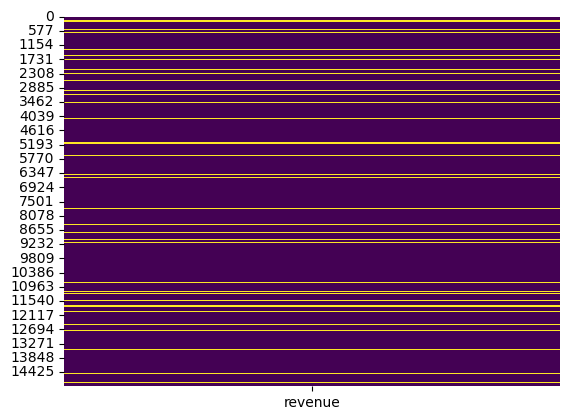

In [4]:
import pandas as pd
# i want to see all the columns when i printed them. 
pd.set_option('display.max_columns', None)
#import data
sales = pd.read_csv('product_sales.csv')

# see which columns has null values
print(sales.isnull().any())
# print the number of null rows
sales['revenue'].isnull().sum()

#plot the null values of revenue column
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(sales[['revenue']].isnull(), cmap='viridis', cbar=False)
plt.show()



In [11]:
# Step 1: Calculate the average revenue per product sold
average_revenue_per_unit = (sales['revenue'] / sales['nb_sold']).mean()

# Step 2: Impute the missing revenue values where nb_sold is available
sales['revenue'] = sales.apply(
    lambda row: row['nb_sold'] * average_revenue_per_unit if pd.isnull(row['revenue']) and not pd.isnull(row['nb_sold']) else row['revenue'], 
    axis=1
)

# Step 3: Round the revenue values to 2 decimal places
sales['revenue'] = sales['revenue'].round(2)
# Check the updated DataFrame
print(sales.head(10))

# fix typos in sales_method column
sales['sales_method'] = sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
print(sales['sales_method'].unique())

# correct erroneous values in years_as_customer
sales[sales['years_as_customer']>40]
sales.loc[sales['years_as_customer']>40, 'years_as_customer']=40

valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Check for invalid state names
invalid_states = sales[~sales['state'].isin(valid_states)]['state']
print("Invalid state names:")
print(invalid_states)

# i wanted to see the distribution within the numeric values to identify any irregularities
print(sales.describe())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    90.99   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   100.09   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   
5     6          Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13    65.01   
6     4         Email  eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94       11   113.38   
7     1         Email  047df079-071b-4380-9012-2bfe9bce45d5       10    99.94   
8     5         Email  771586bd-7b64-40be-87df-afe884d2af9e       11   108.34   
9     5          Call  56491dae-bbe7-49f0-a651-b823a01103d8       11    53.82   

   years_as_customer  nb_site_visits          state  
0                  0              24        Arizona  


- sales_method: Fixed the inconsistent entries like 'em + call' instead of 'Email + Call' and 'email' instead of 'Email'. 
- revenue: Calculated the average revenue per nb_sold value and imputed the missing revenue values with the average revenue for their respective nb_sold values. 
- years_as_customer: The company is 40 years old but there were some rows with more than 40 on this column. I changed those greater than 40 to 40 as  there were only a few incorrect data point and I did not want to lose valuable data points for other columns. 
- No issues were observed in other columns. There were no duplicate rows, no duplicate customer_id. I examined the distribution of each numeric column and identified the ones that had unusual values. I also created a state list with correct state names and compared it to the state column. There were no issues in the state column either. 

### Exploratory Analysis:
- How many customers were there for each approach? 
    - Email method, call method and email  + call combination method are used to approach 7466, 4962 and 2572 customers respectively. Here is the graph showing the counts: 


sales_method
Call            4962
Email           7466
Email + Call    2572
dtype: int64


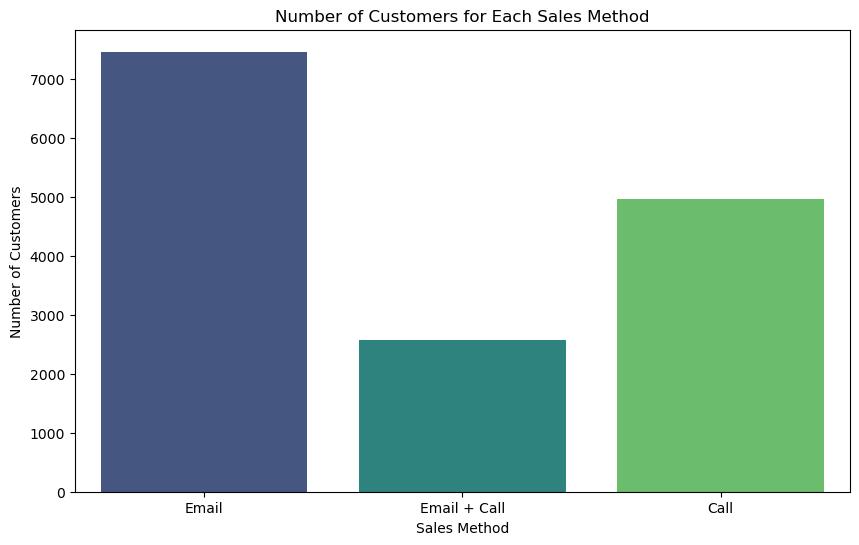

In [7]:
# count customers per each sales method
sales_method_counts = sales.groupby('sales_method').size()
print(sales_method_counts)

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_method', data=sales, palette='viridis')

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for Each Sales Method')
#plt.xticks(rotation=45)  # Rotate x labels if needed

# Show the plot
plt.show()

- Overall spread of revenue:  

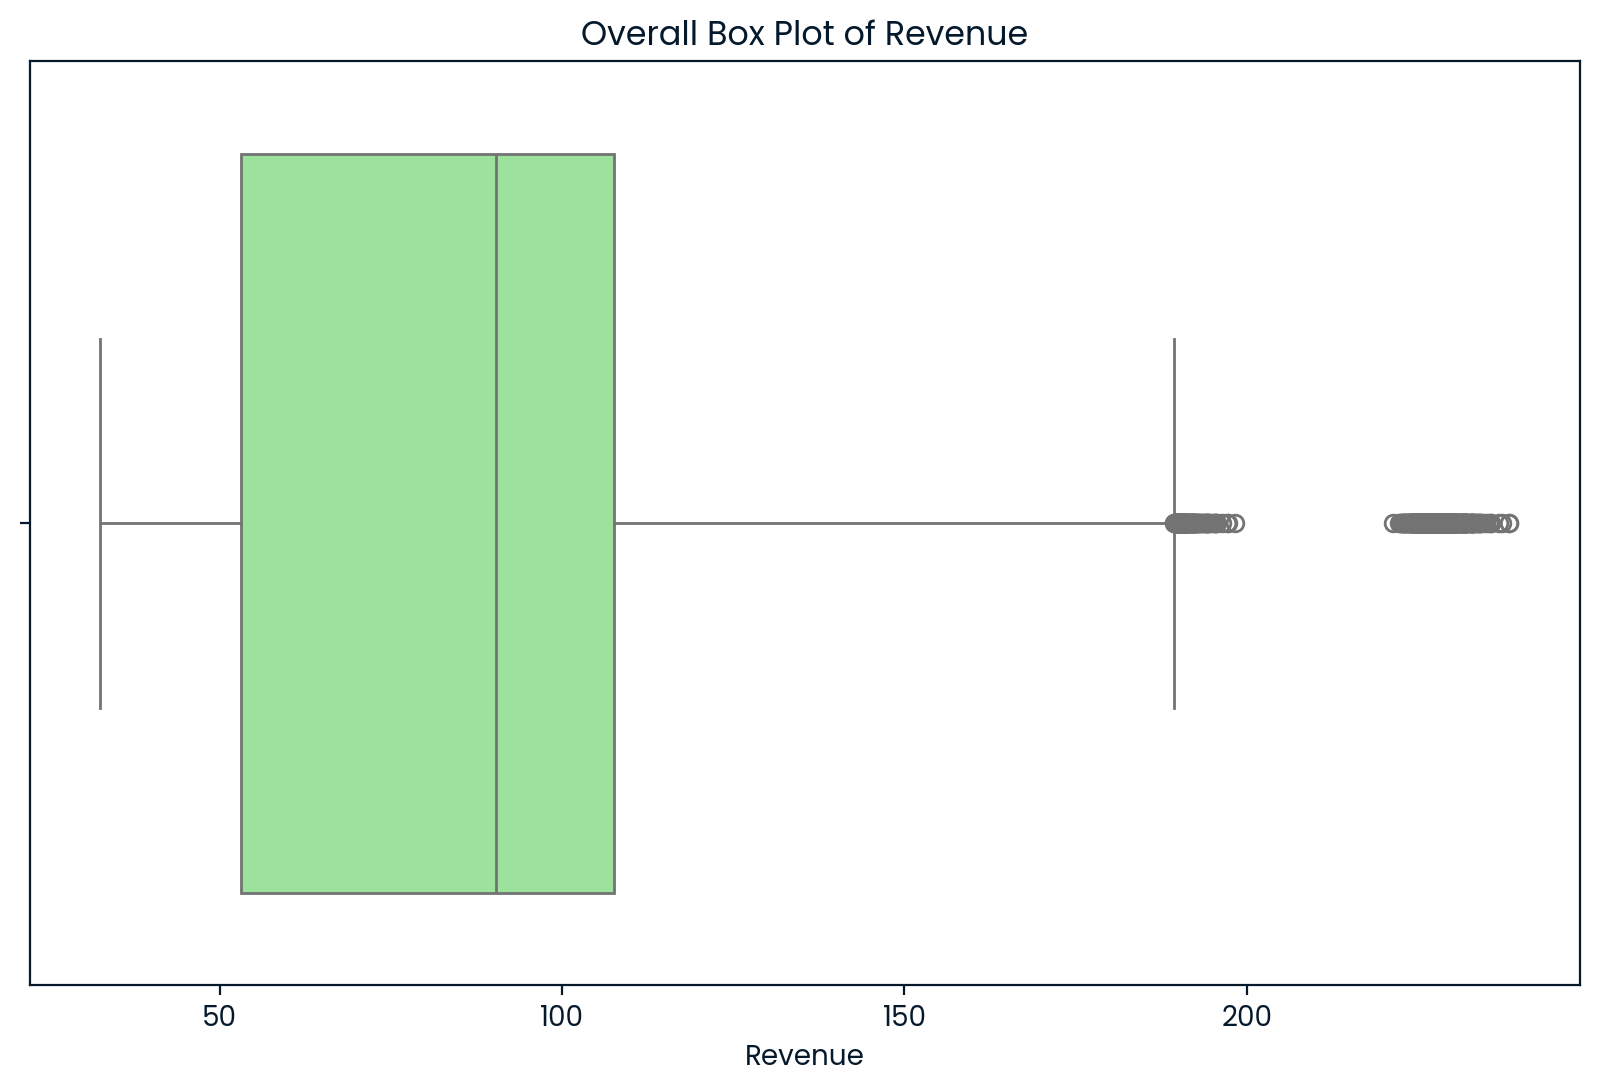

In [35]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['revenue'], color='lightgreen')
plt.title('Overall Box Plot of Revenue')
plt.xlabel('Revenue')
plt.show()

Even though there are some higher value outliers, majority of sales are clustered between \$53 and \$107 range, median being \$90.30.   

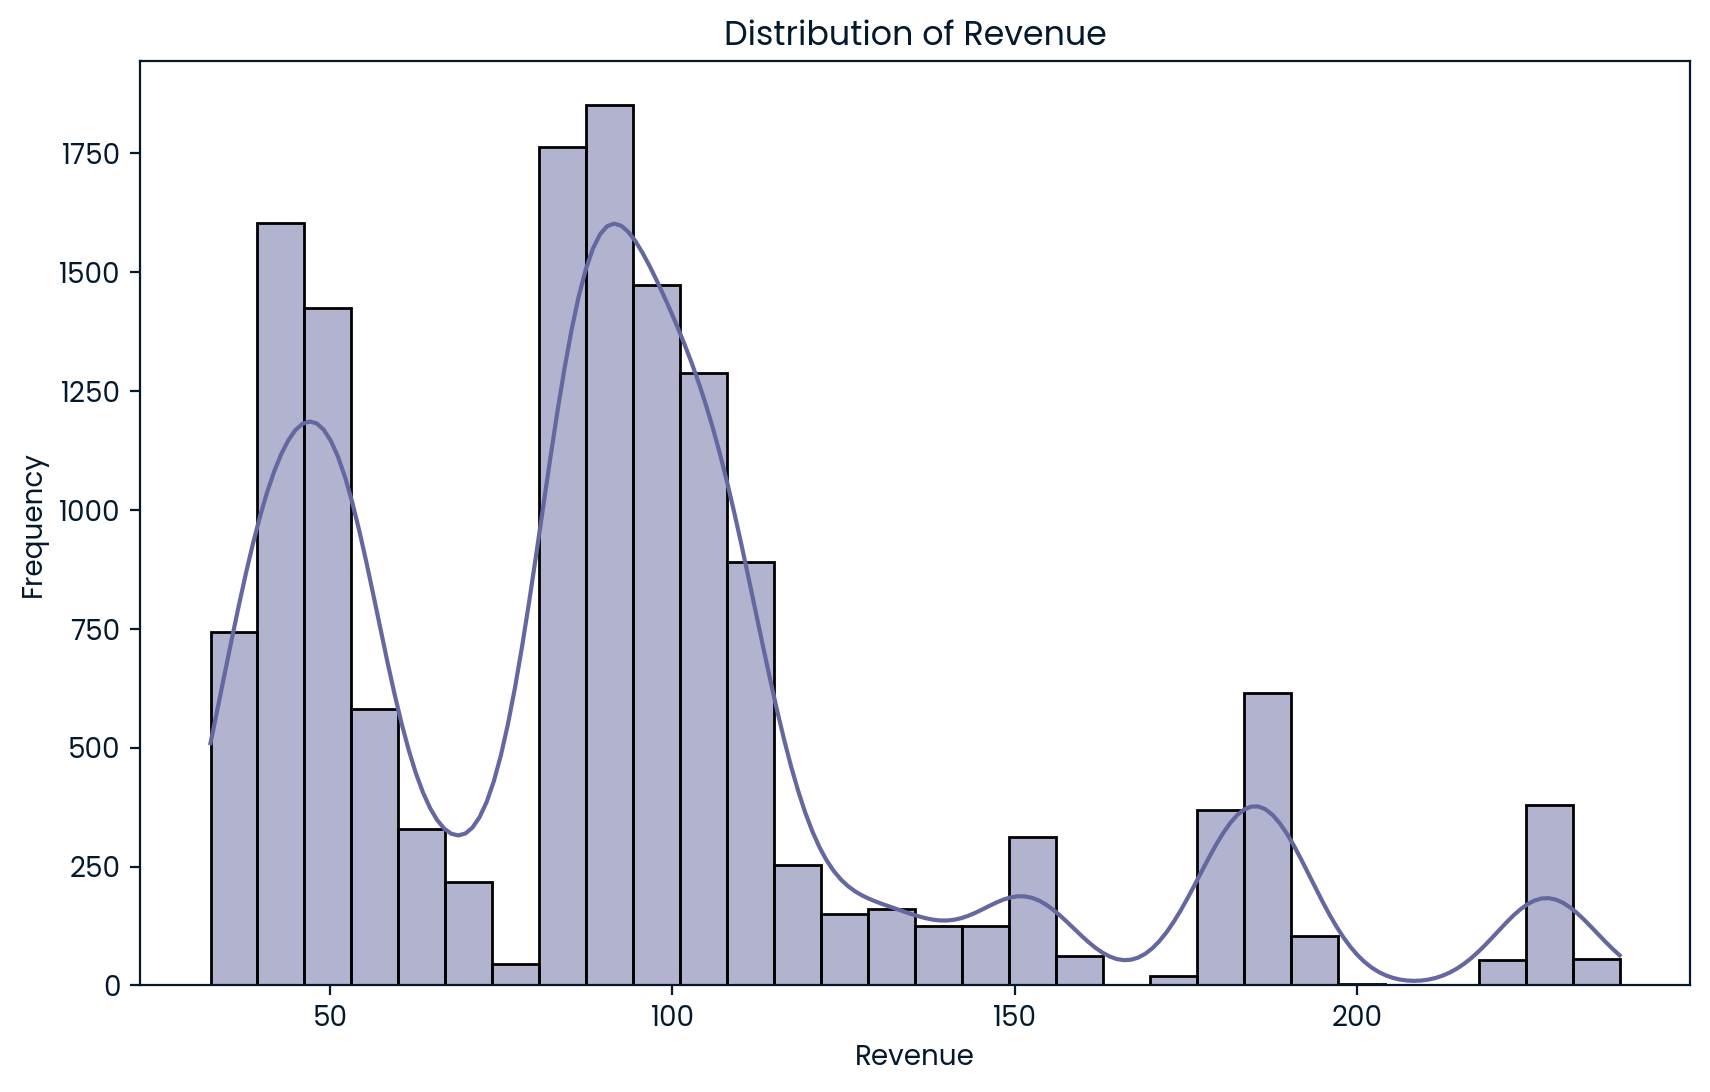

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of revenue
plt.figure(figsize=(10, 6))
sns.histplot(sales['revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


Histogram representation of the revenue spread show two significant peak in data at around \$50 and \$90 which is in agreement with the box plot representation above.  
- Spread of revenue by sales method: 
    - Call method is bringing a lower revenue while email and call combined is bringing the highest revenue. Email only method is in between the two other methods. Please see the diagram below. 

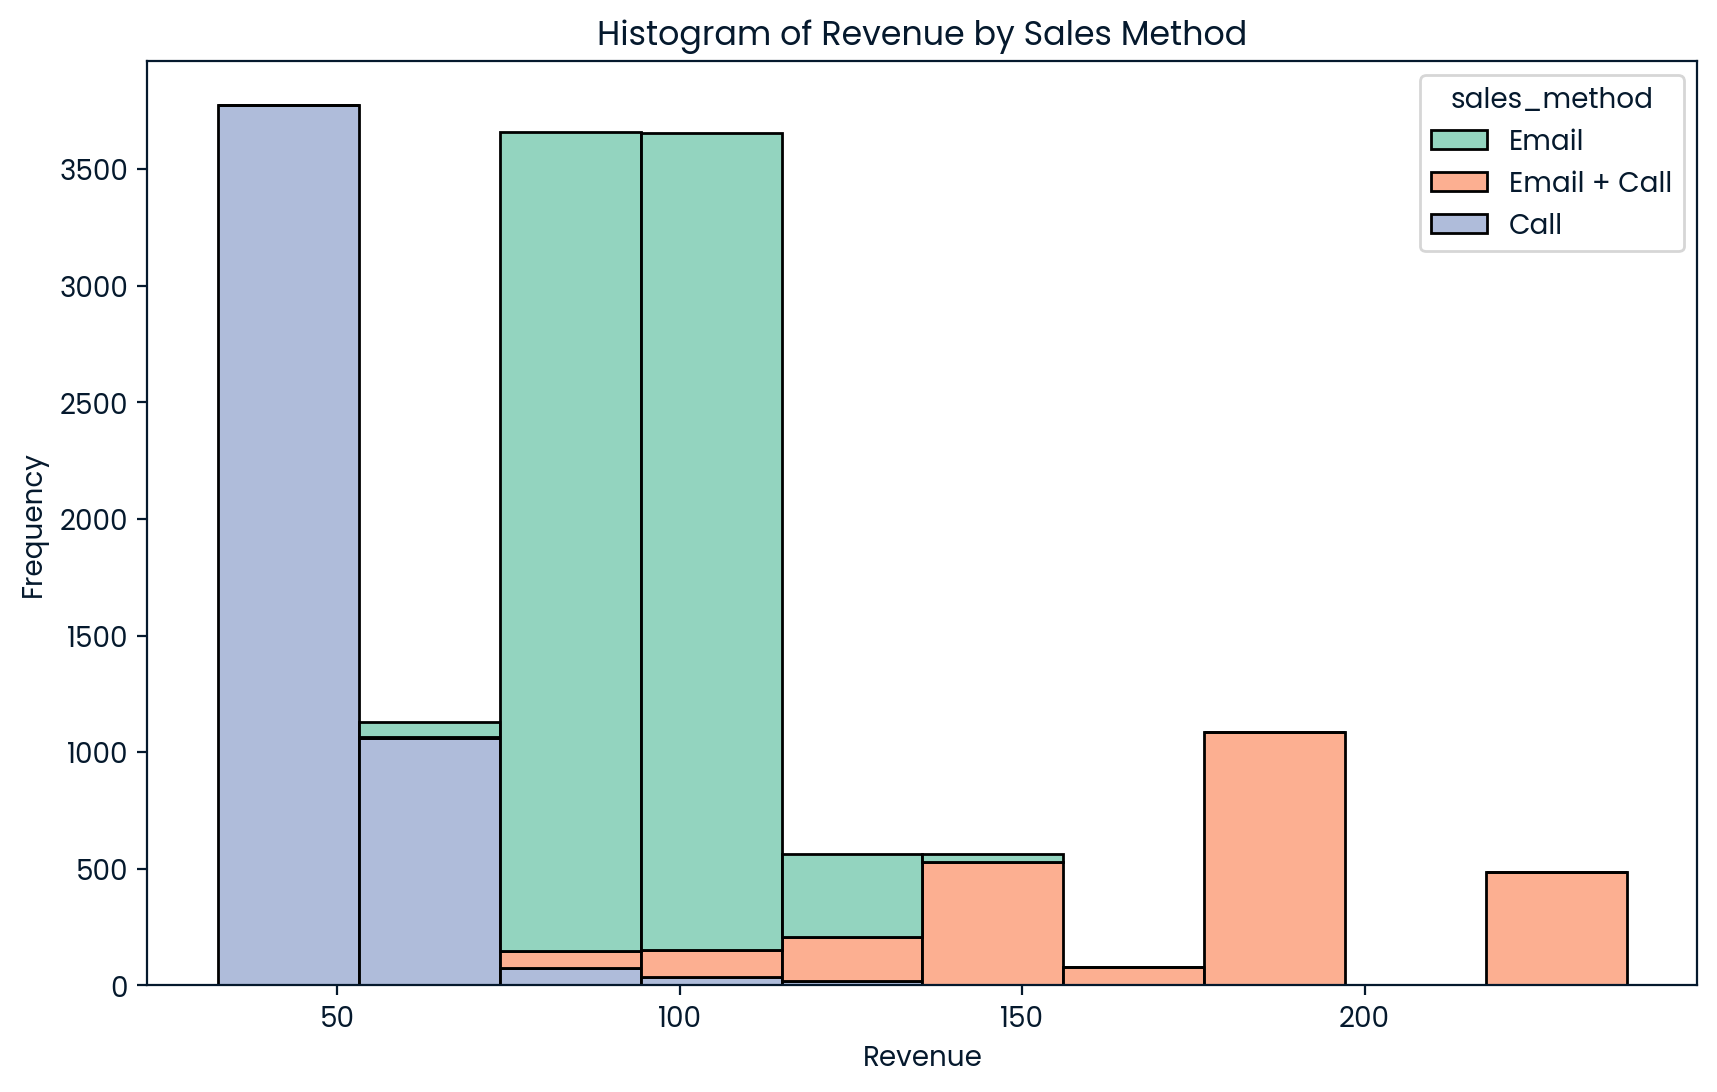

In [37]:
# histogram of revenue based on sales method
# Create a histogram of revenue based on sales method
plt.figure(figsize=(10, 6))
sns.histplot(data=sales, x='revenue', hue='sales_method', multiple='stack', bins=10, palette='Set2', alpha = 0.7)

# Adding labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue by Sales Method')

# Show plot
plt.show()

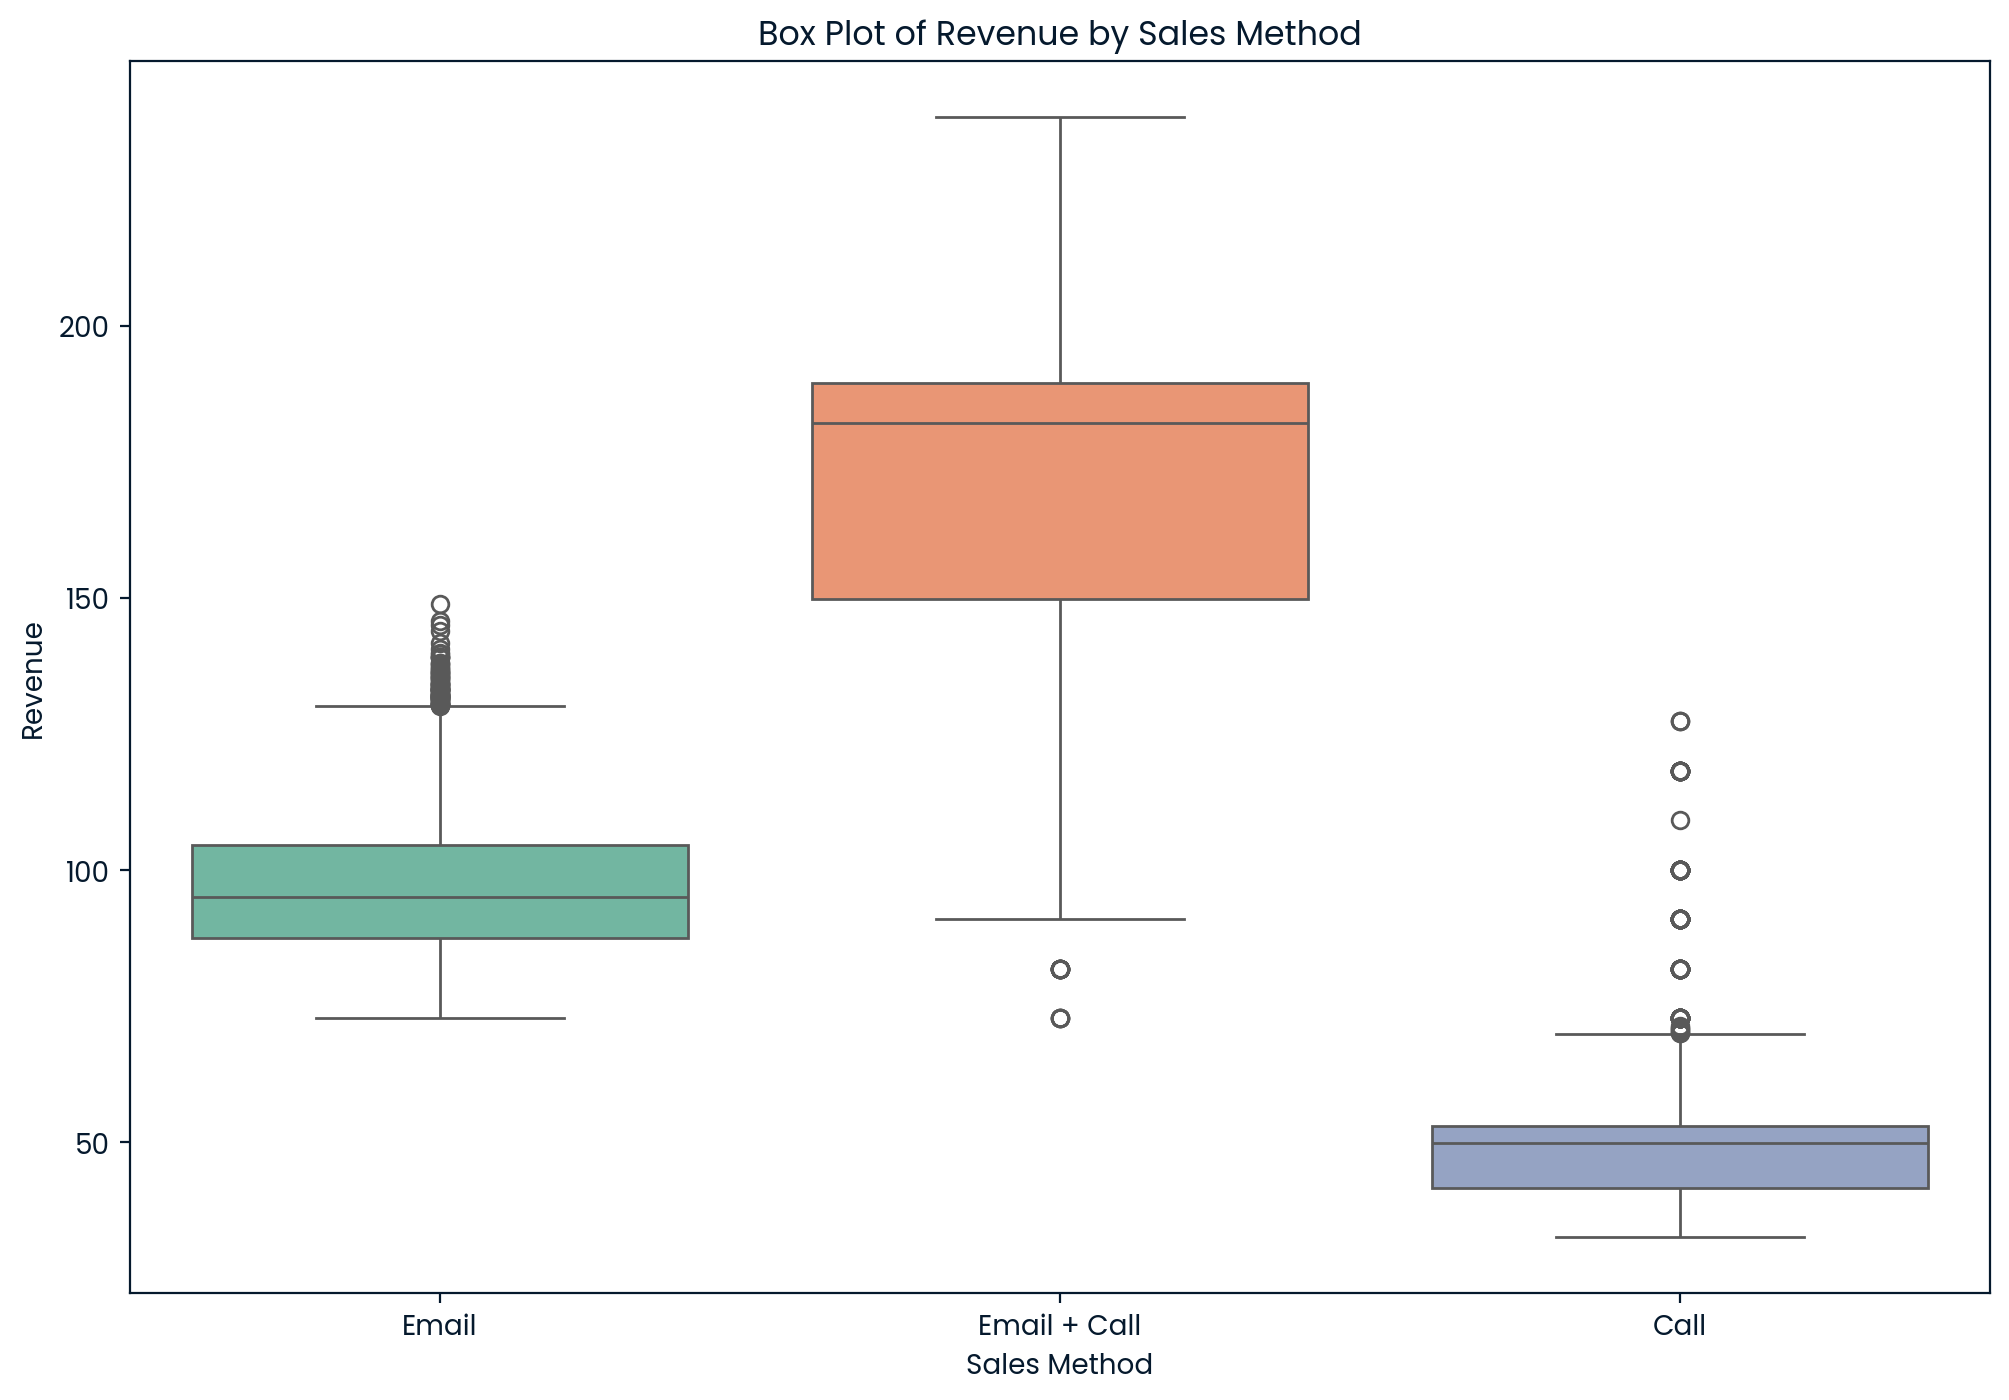

In [38]:
# box plot by method
plt.figure(figsize=(12, 8))
sns.boxplot(x='sales_method', y='revenue', data=sales, palette='Set2')
plt.title('Box Plot of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

While email-only approach has a very similar distribution to the overall spread of revenue, we can clearly see the higher revenue data from email and call combination. Call method has the most outliers but overall, it brings the lowest revenue. It's also good to address that the volume of call method approach is almost twice the email+call combination. 

- Revenue over time: Based on the charts below, total revenue and average revenue per sales method are following different trajectories. 
    - Total revenue over weeks: 
        - Email is generating almost all of the total revenue in the first week, however, the total revenue generated by email method decreased over weeks. By week 6, email method brought the least amount of total revenue. 
        - Email + Call method picked up after week 3 and became the method with the highest revenue. 
        - Fianlly, call method is consistently the lowest revenue-generating method except the last week. 
    - Average revenue over weeks: 
        - Consistent with the box plot representations above, Email + Call method has the highest average revenue, while Call method has the lowest average revenue. Email method brings revenue similar to the overall averages.  
    - Overall total revenue: Total revenue from all types of methods oscillates around 80 thousand dollars over the weeks. However, average overall revenue is consistently raising.  


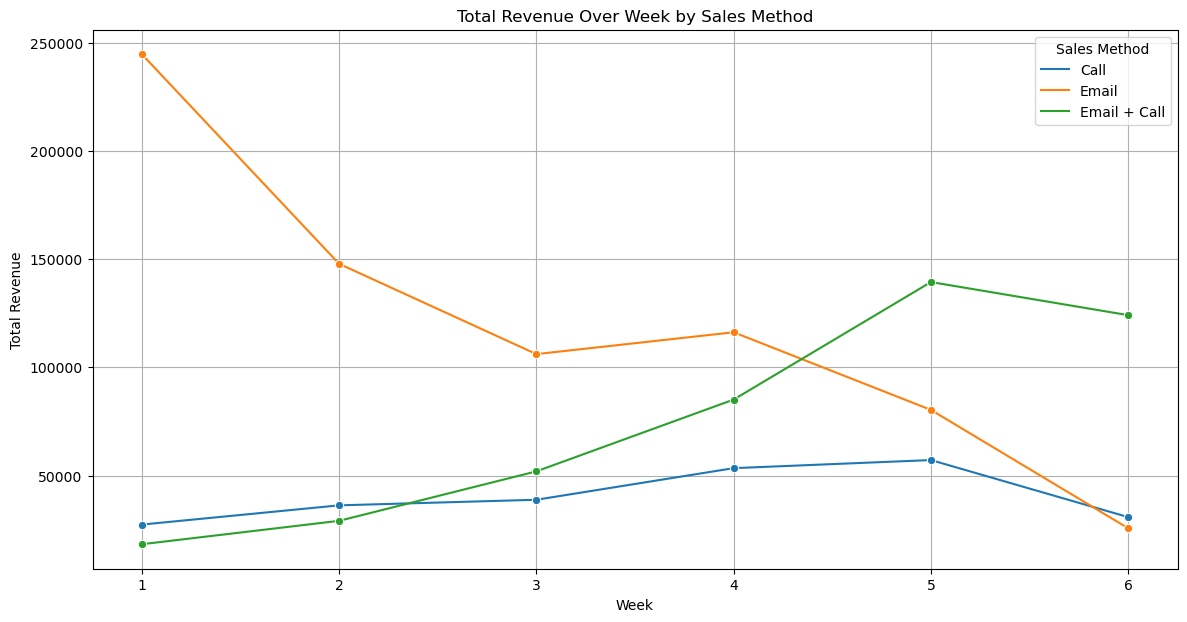

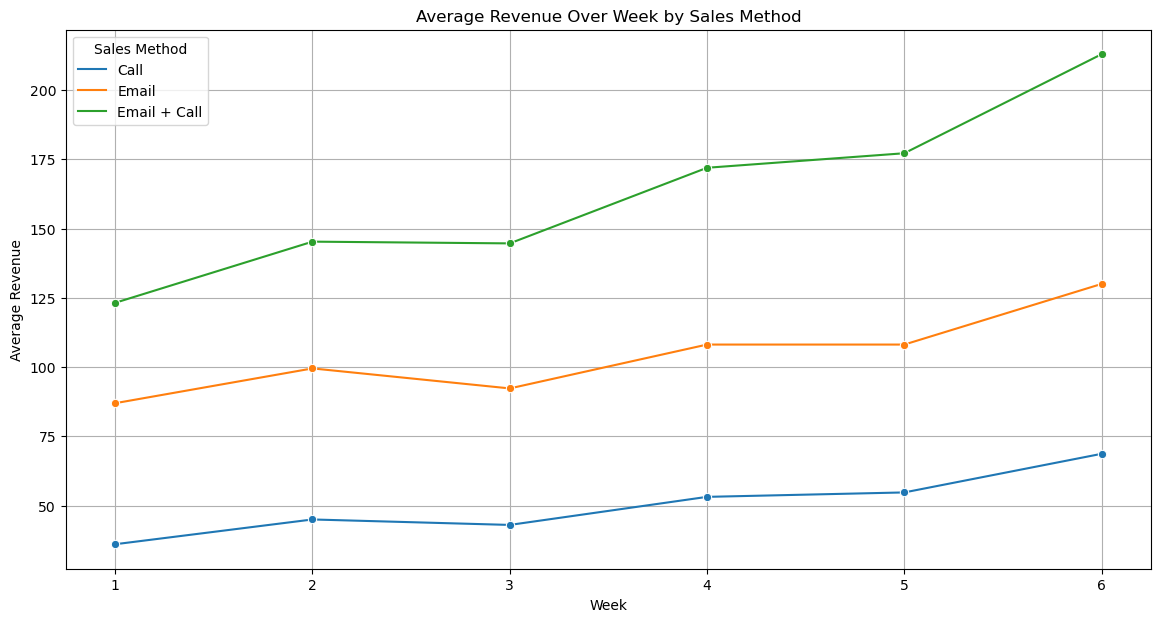

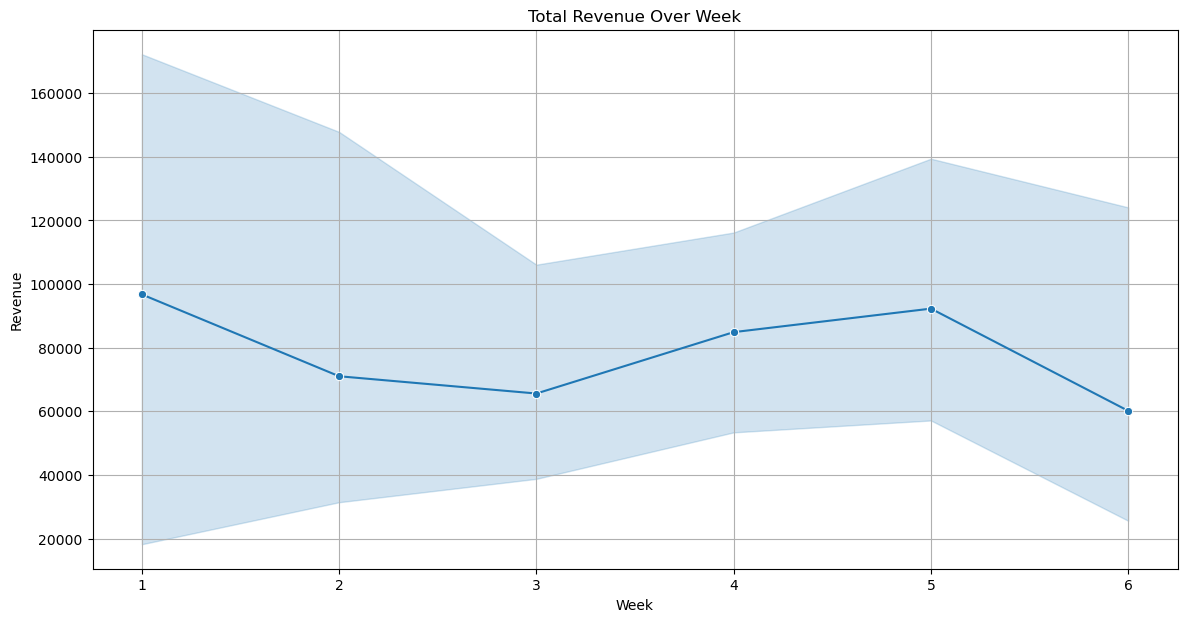

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate to get total revenue per week and sales method
total_revenue = sales.groupby(['week', 'sales_method']).agg({'revenue': 'sum'}).reset_index()

# Create the line plot
plt.figure(figsize=(14, 7))

# Line plot for total revenue over week with different colors for each sales method
sns.lineplot(x='week', y='revenue', data=total_revenue, hue='sales_method', marker='o')

plt.title('Total Revenue Over Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()



# Aggregate to get average revenue per week and sales method
average_revenue = sales.groupby(['week', 'sales_method']).agg({'revenue': 'mean'}).reset_index()

# Create the line plot
plt.figure(figsize=(14, 7))

# Line plot for average revenue over week with different colors for each sales method
sns.lineplot(x='week', y='revenue', data=average_revenue, hue='sales_method', marker='o')

plt.title('Average Revenue Over Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()


# Plot total revenue over week
plt.figure(figsize=(14, 7))

sns.lineplot(x='week', y='revenue', data=total_revenue, marker='o')

plt.title('Total Revenue Over Week')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

- Years as customer: When we compared the average revenue by years_as_customer data, we see that the length of relationship with the customer does not have a significant effect on the amount of revenue. 

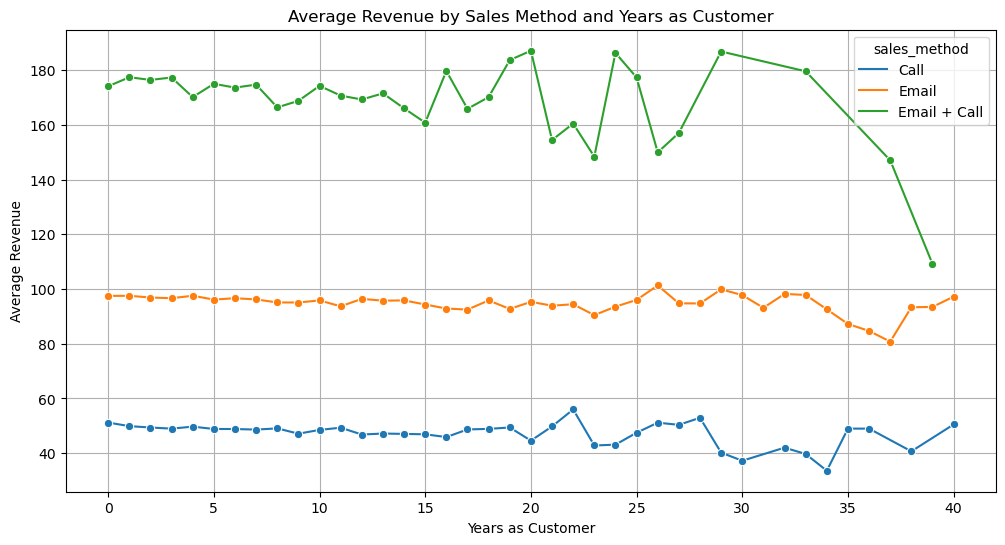

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average revenue by sales_method and years_as_customer
avg_revenue_years = sales.groupby(['sales_method', 'years_as_customer'])['revenue'].mean().reset_index()

# plot the average revenue by sales method and years as customer
plt.figure(figsize=(12, 6))
sns.lineplot(x='years_as_customer', y='revenue', hue='sales_method', data=avg_revenue_years, marker='o')

plt.title('Average Revenue by Sales Method and Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Average Revenue')

plt.grid(True)
plt.show()

- Revenue by state: 
    - 16 states brought revenues above average. When evaluating sales methods, it's important to pay attention to the states that are bringing the highest revenues. For example, call method to California customers is bringing a revenue higher than many other states' total revenue. California, Texas, New York and Florida are the states that are sources to the highest revenues for the company.    

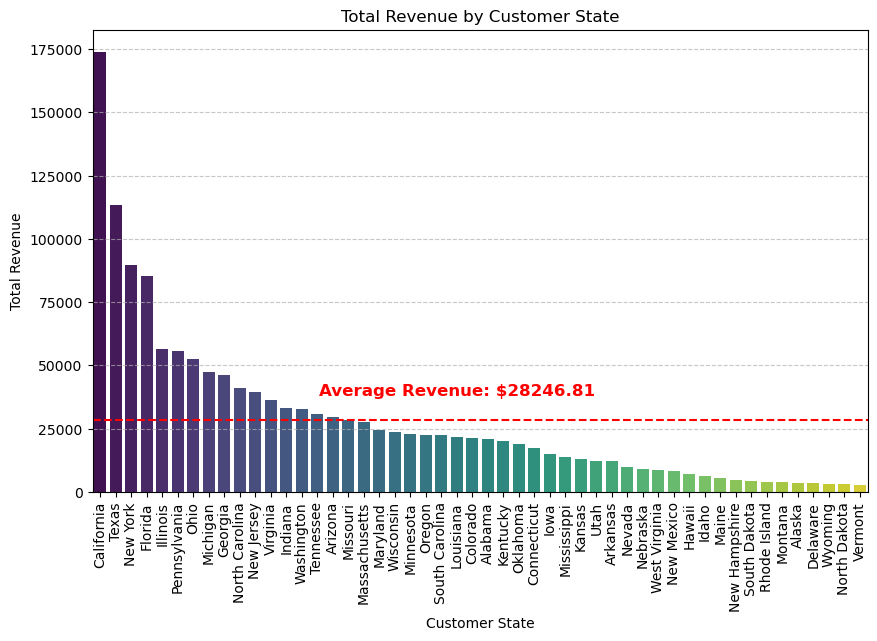

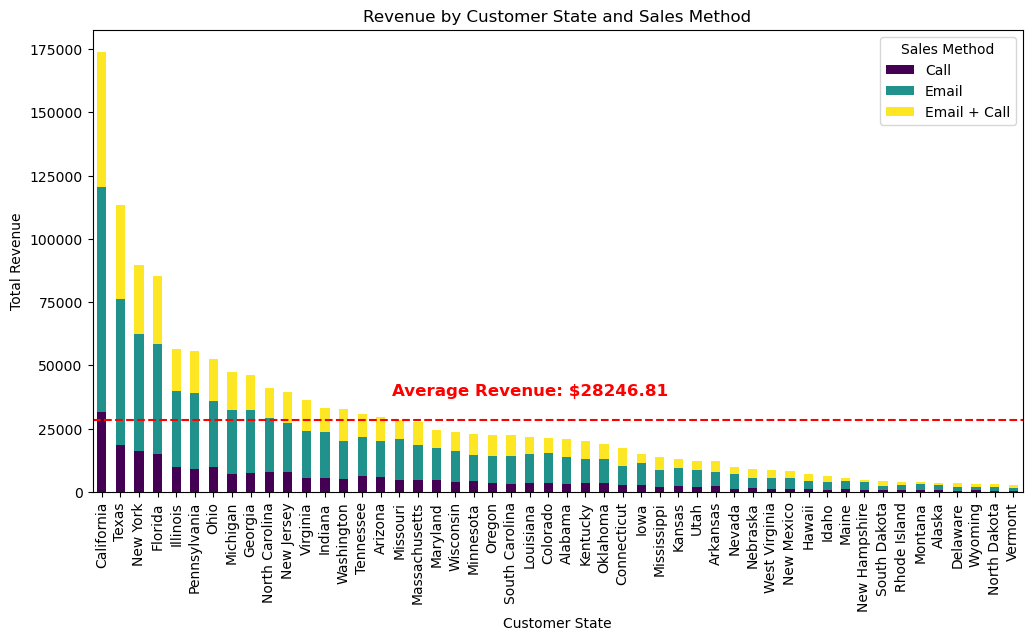

In [18]:
# state revenues sorted alphabetically
state_revenue = sales.groupby('state', as_index=False)['revenue'].sum().sort_values('state')
# Calculate the average revenue
average_revenue = state_revenue['revenue'].mean()

"""
# Create the bar plot
plt.figure(figsize=(10, 6))

# Bar plot for revenue by customer state
sns.barplot(x='state', y='revenue', data=state_revenue, palette='viridis')
# Add horizontal line for average revenue
plt.axhline(y=average_revenue, color='r', linestyle='--')
# Add annotation for the average line
plt.text(
    x=23,  # X position (can be adjusted)
    y=average_revenue + (0.05 * state_revenue['revenue'].max()),  # Y position (above the line)
    s=f'Average Revenue: ${average_revenue:.2f}',
    color='r',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)

plt.title('Total Revenue by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
"""
# sorted by revenue
sorted_state_revenue = sales.groupby('state', as_index=False)['revenue'].sum().sort_values('revenue', ascending = False)
# Create the bar plot
plt.figure(figsize=(10, 6))
# Bar plot for revenue by customer state
sns.barplot(x='state', y='revenue', data=sorted_state_revenue, palette='viridis')
# Add horizontal line for average revenue
plt.axhline(y=average_revenue, color='r', linestyle='--')
# Add annotation for the average line
plt.text(
    x=23,  # X position (can be adjusted)
    y=average_revenue + (0.05 * state_revenue['revenue'].max()),  # Y position (above the line)
    s=f'Average Revenue: ${average_revenue:.2f}',
    color='r',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)
plt.title('Total Revenue by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## stacked bar chart to see the share of sales method in each states total revenue

# Aggregate revenue by customer state and sales method
state_revenue_by_method = sales.groupby(['state', 'sales_method'], as_index=False)['revenue'].sum().sort_values('revenue', ascending = False)

# Pivot the data for stacked bar chart
pivot_df = state_revenue_by_method.pivot(index='state', columns='sales_method', values='revenue').fillna(0)

# Calculate total revenue for each state and sort based on this total
pivot_df['total_revenue'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('total_revenue', ascending=False)
# Drop the 'total_revenue' column after sorting (if you don't want to show it)
pivot_df = pivot_df.drop(columns='total_revenue')

# Create the stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
# Add horizontal line for average revenue
plt.axhline(y=average_revenue, color='r', linestyle='--')
# Add annotation for the average line
plt.text(
    x=23,  # X position (can be adjusted)
    y=average_revenue + (0.05 * state_revenue['revenue'].max()),  # Y position (above the line)
    s=f'Average Revenue: ${average_revenue:.2f}',
    color='r',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)
# Set titles and labels
plt.title('Revenue by Customer State and Sales Method')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(title='Sales Method')
plt.show()

## Monitoring the revenue trend by sales method (weekly): 
- I suggest that we track the total revenue brought in by each sales method (email, call, email + call) on a weekly basis. This will help visualize growth and identify which method is driving the most revenue over time. 
- Monitoring this particular metric will help us 
    - Optimize sales strategy by investing more in methods that drive revenue efficiently.
    - Reduce reliance on labor-intensive methods that underperform (i.e. calling only)
    - Identify inflection points where methods like "email + call" gain momentum and adjust resource allocation accordingly. 
- If we use the past 6 weeks trend and try to estimate next week's revenue by sales data, we see the plot below. I estimated growth in "email + call" method as well as "call" method and decline in "email" method. This is just an estimate if the resource allocation kept as is. 

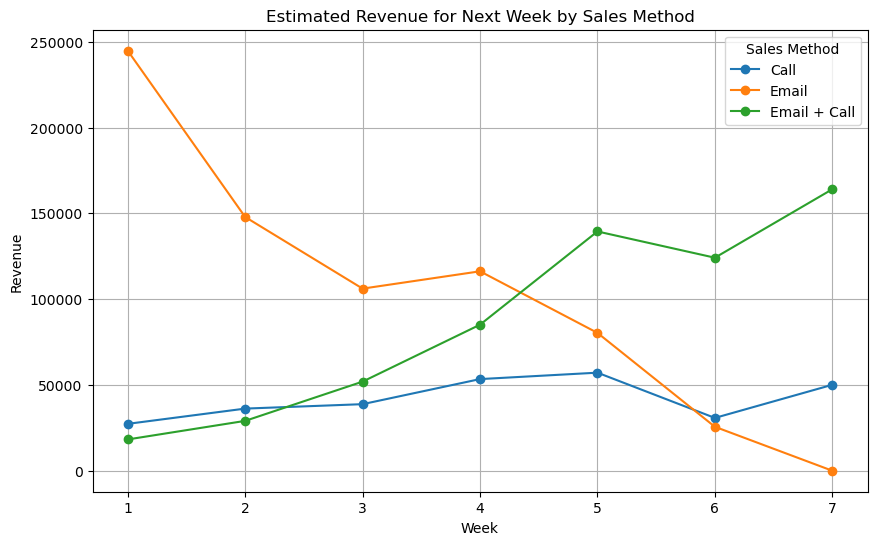

In [21]:
# estimate weekly revenues by sales_method

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Aggregate to get total revenue per week and sales method
#weekly_revenue = sales.groupby(['week', 'sales_method']).agg({'revenue': 'sum'}).reset_index()
weekly_revenue = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()


# Prepare the data for modeling
# Pivot the table to have weeks as rows, sales methods as columns

weekly_revenue_pivot = weekly_revenue.pivot(index='week', columns='sales_method', values='revenue')

# Fill any missing values (if needed)
weekly_revenue_pivot = weekly_revenue_pivot.fillna(0)

# Set up the regression model for each sales method
X = np.array(weekly_revenue_pivot.index).reshape(-1, 1)  # Weeks as the independent variable

# Create an empty dataframe to store future estimates
future_estimates = pd.DataFrame(columns=weekly_revenue_pivot.columns, index=[weekly_revenue_pivot.index[-1] + 1])

# Fit a linear regression for each sales method and predict the next week's revenue
for method in weekly_revenue_pivot.columns:
    y = weekly_revenue_pivot[method].values  # Revenue as the dependent variable
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the next week (week + 1)
    next_week = np.array([[weekly_revenue_pivot.index[-1] + 1]])
    prediction = model.predict(next_week)
    
    # Clip the prediction to be non-negative
    future_estimates[method] = np.clip(prediction, 0, None)

# Print out the estimated values for the next week
# print(future_estimates)

# visualize 
import matplotlib.pyplot as plt

# Add the future estimates to the existing data for visualization
weekly_revenue_extended = pd.concat([weekly_revenue_pivot, future_estimates])

# Plot the results
plt.figure(figsize=(10, 6))
for method in weekly_revenue_extended.columns:
    plt.plot(weekly_revenue_extended.index, weekly_revenue_extended[method], marker='o', label=method)

plt.title('Estimated Revenue for Next Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(weekly_revenue_extended.index)
plt.legend(title='Sales Method')
plt.grid(True)
plt.show()


## Summary and recommendations

The sales data analysis focused on three main sales methods: Email, Call, and Email + Call. The revenue trends across these methods revealed key insights:
1. **Email** was the most effective sales method, especially during the first four weeks, bringing in the highest revenue consistently.
2. **Email + Call** started slow but showed strong growth after week four, eventually surpassing email-only revenue in the later weeks. This method appears to provide more long-term revenue growth potential.
3. **Call** was the least effective and most labor-intensive, consistently generating the lowest revenue among the three methods.

When analyzing the spread of revenue based on different sales methods, it was found that **Email + Call** contributed more to total revenue in later weeks. Additionally, customer tenure (measured by **years_as_customer**) didn’t significantly affect average revenue, indicating that the choice of sales method is a more critical driver of revenue than how long the customer has been with the business.

Sixteen states brought revenues above the average. California, Texas, New York, and Florida lead in total revenue generation.
Notably, the call method in California produces higher revenue than the total revenue from many other states.

### **Recommendations**
1. **Focus on Email + Call**: Since the Email + Call method starts slower but surpasses email-only revenue after week 4, it could be beneficial to explore scaling this approach for sustained performance.
   
2. **Optimize Call Efforts**: Given that the call method yields low revenue overall, it may be worth reallocating resources to more successful methods or refining call strategies to target high-performing regions such as California.

3. **State-Specific Strategies**: Given the concentration of revenue from specific states (CA, TX, NY, FL), sales efforts should prioritize these regions, especially with the call method in California showing high effectiveness.

4. **Monitor and Experiment with Sales Methods**: Based on the trends, monitor future weeks to ensure the predictions hold true. Experimenting with more aggressive email or call strategies in underperforming states may provide insights into increasing revenue in those areas. 

These actions could help streamline the company's sales strategy for more targeted and efficient operations.